# Exploritory Data Analysis Healthcare Dataset

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [271]:
PATH_EXCEL = r"C:\Users\ayber\OneDrive\Desktop\DataGlacier Project\Healthcare_dataset.xlsx"

df = pd.read_excel(PATH_EXCEL,
                   sheet_name=1)
feature_description = pd.read_excel(PATH_EXCEL,
                     sheet_name=0)

feature_description.head()

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table


In [272]:
## Shape of the dataframe

df.shape

(3424, 69)

In [273]:
feature_description["Variable"]

0                              Patient ID
1                        Persistency_Flag
2                                     Age
3                                    Race
4                                  Region
5                               Ethnicity
6                                  Gender
7                           IDN Indicator
8               NTM - Physician Specialty
9                          NTM - T-Score 
10                     Change in T Score 
11                     NTM - Risk Segment
12                 Change in Risk Segment
13            NTM - Multiple Risk Factors
14              NTM - Dexa Scan Frequency
15                NTM - Dexa Scan Recency
16                    Dexa During Therapy
17       NTM - Fragility Fracture Recency
18      Fragility Fracture During Therapy
19           NTM - Glucocorticoid Recency
20    Glucocorticoid Usage During Therapy
21            NTM - Injectable Experience
22                     NTM - Risk Factors
23                     NTM - Comor

## Data Overview

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [275]:
# Converting the objects to category to gain performance.

df.loc[:, df.nunique() < 50] = df.loc[:, df.nunique() < 50].astype('category') # Changing the value types to category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype   
---  ------                                                              --------------  -----   
 0   Ptid                                                                3424 non-null   object  
 1   Persistency_Flag                                                    3424 non-null   category
 2   Gender                                                              3424 non-null   category
 3   Race                                                                3424 non-null   category
 4   Ethnicity                                                           3424 non-null   category
 5   Region                                                              3424 non-null   category
 6   Age_Bucket                                                          3424 non-null   category
 7   Ntm_Sp

C:\Users\ayber\AppData\Local\Temp\ipykernel_2236\2176428914.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, df.nunique() < 50] = df.loc[:, df.nunique() < 50].astype('category') # Changing the value types to category


## Data Understanding

In [276]:
def analyse_clmn(col_name, dataframe = df):
    """Function for analysing the column and plotting."""
    print(f"Value Counts for the {col_name}")
    print("-" * 50)
    print(dataframe[col_name].value_counts().head())
    print("-" * 50)
    print(f"Column Desctiption for the {col_name}")
    print("-" * 50)
    print(dataframe[col_name].describe())
    print("-" * 50)
    dataframe[col_name].value_counts().head().sort_values(ascending=True).plot.barh(color="olive")
    plt.show()
    

Value Counts for the Persistency_Flag
--------------------------------------------------
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
--------------------------------------------------
Column Desctiption for the Persistency_Flag
--------------------------------------------------
count               3424
unique                 2
top       Non-Persistent
freq                2135
Name: Persistency_Flag, dtype: object
--------------------------------------------------


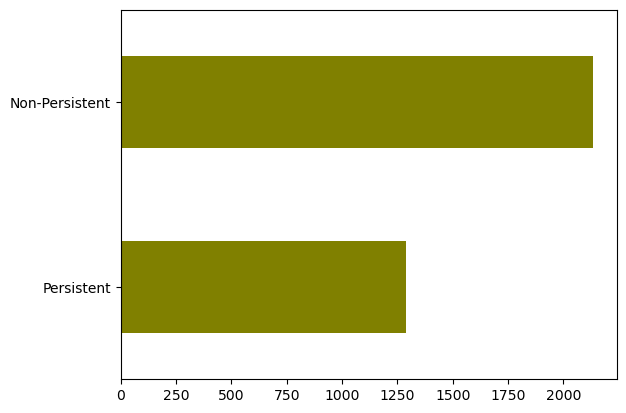

In [277]:
analyse_clmn("Persistency_Flag")

We have unbalanced target column!

Value Counts for the Age_Bucket
--------------------------------------------------
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
--------------------------------------------------
Column Desctiption for the Age_Bucket
--------------------------------------------------
count     3424
unique       4
top        >75
freq      1439
Name: Age_Bucket, dtype: object
--------------------------------------------------


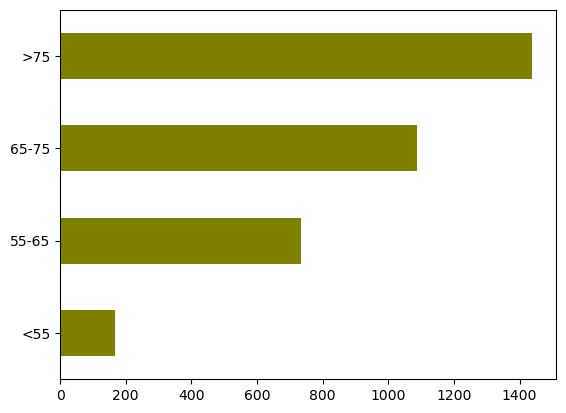

In [278]:
analyse_clmn("Age_Bucket")

Value Counts for the Race
--------------------------------------------------
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
--------------------------------------------------
Column Desctiption for the Race
--------------------------------------------------
count          3424
unique            4
top       Caucasian
freq           3148
Name: Race, dtype: object
--------------------------------------------------


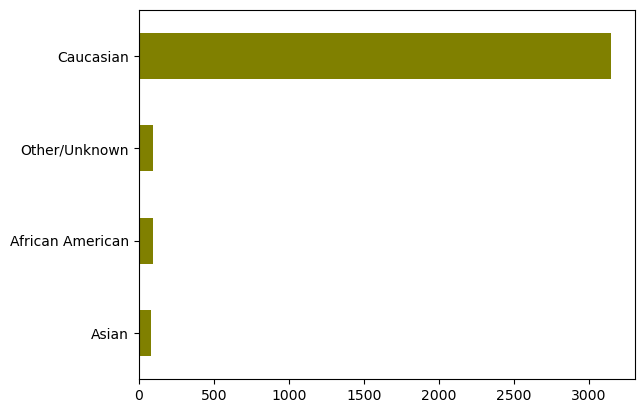

In [279]:
analyse_clmn("Race")

Value Counts for the Region
--------------------------------------------------
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
--------------------------------------------------
Column Desctiption for the Region
--------------------------------------------------
count        3424
unique          5
top       Midwest
freq         1383
Name: Region, dtype: object
--------------------------------------------------


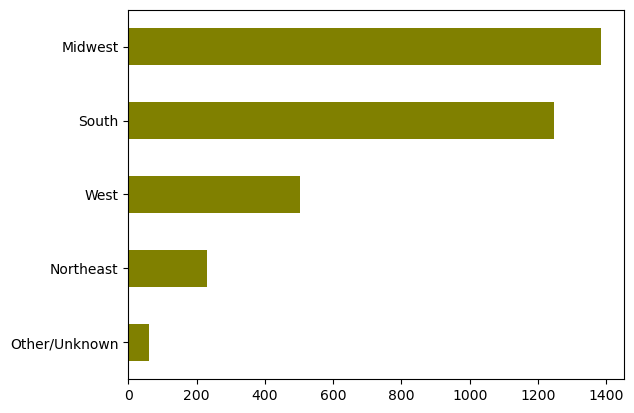

In [280]:
analyse_clmn("Region")

Value Counts for the Ethnicity
--------------------------------------------------
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
--------------------------------------------------
Column Desctiption for the Ethnicity
--------------------------------------------------
count             3424
unique               3
top       Not Hispanic
freq              3235
Name: Ethnicity, dtype: object
--------------------------------------------------


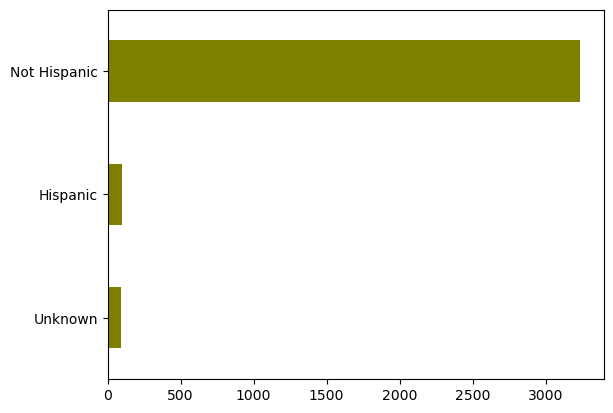

In [281]:
analyse_clmn("Ethnicity")

Value Counts for the Gender
--------------------------------------------------
Female    3230
Male       194
Name: Gender, dtype: int64
--------------------------------------------------
Column Desctiption for the Gender
--------------------------------------------------
count       3424
unique         2
top       Female
freq        3230
Name: Gender, dtype: object
--------------------------------------------------


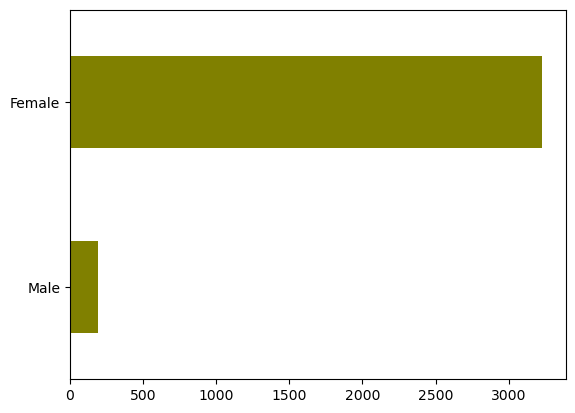

In [282]:
analyse_clmn("Gender")

Value Counts for the Idn_Indicator
--------------------------------------------------
Y    2557
N     867
Name: Idn_Indicator, dtype: int64
--------------------------------------------------
Column Desctiption for the Idn_Indicator
--------------------------------------------------
count     3424
unique       2
top          Y
freq      2557
Name: Idn_Indicator, dtype: object
--------------------------------------------------


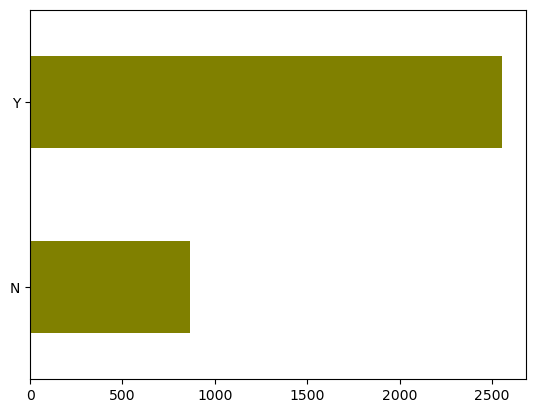

In [283]:
analyse_clmn("Idn_Indicator")

Value Counts for the Ntm_Speciality
--------------------------------------------------
GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
ENDOCRINOLOGY            458
Unknown                  310
ONCOLOGY                 225
Name: Ntm_Speciality, dtype: int64
--------------------------------------------------
Column Desctiption for the Ntm_Speciality
--------------------------------------------------
count                     3424
unique                      36
top       GENERAL PRACTITIONER
freq                      1535
Name: Ntm_Speciality, dtype: object
--------------------------------------------------


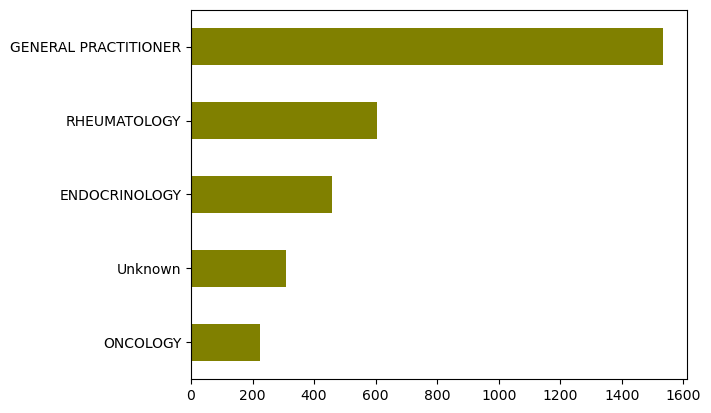

In [284]:
analyse_clmn("Ntm_Speciality")

Value Counts for the Change_T_Score
--------------------------------------------------
No change    1660
Unknown      1497
Worsened      173
Improved       94
Name: Change_T_Score, dtype: int64
--------------------------------------------------
Column Desctiption for the Change_T_Score
--------------------------------------------------
count          3424
unique            4
top       No change
freq           1660
Name: Change_T_Score, dtype: object
--------------------------------------------------


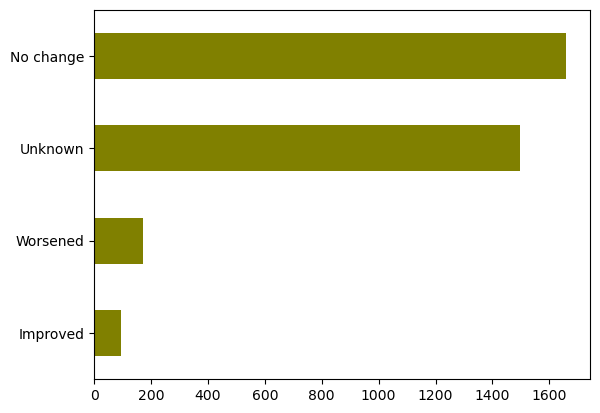

In [285]:
analyse_clmn("Change_T_Score")

Value Counts for the Risk_Segment_During_Rx
--------------------------------------------------
Unknown    1497
HR_VHR      965
VLR_LR      962
Name: Risk_Segment_During_Rx, dtype: int64
--------------------------------------------------
Column Desctiption for the Risk_Segment_During_Rx
--------------------------------------------------
count        3424
unique          3
top       Unknown
freq         1497
Name: Risk_Segment_During_Rx, dtype: object
--------------------------------------------------


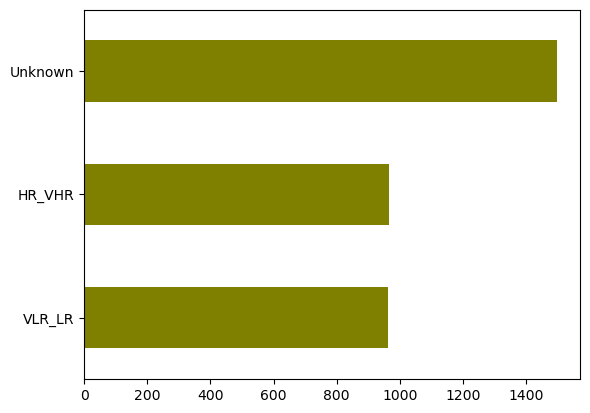

In [286]:
analyse_clmn("Risk_Segment_During_Rx")

Value Counts for the Change_Risk_Segment
--------------------------------------------------
Unknown      2229
No change    1052
Worsened      121
Improved       22
Name: Change_Risk_Segment, dtype: int64
--------------------------------------------------
Column Desctiption for the Change_Risk_Segment
--------------------------------------------------
count        3424
unique          4
top       Unknown
freq         2229
Name: Change_Risk_Segment, dtype: object
--------------------------------------------------


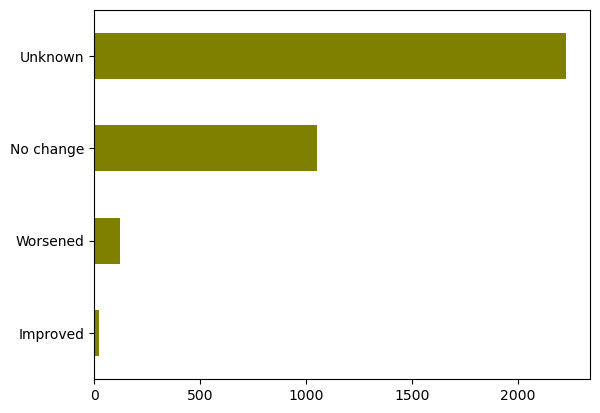

In [287]:
analyse_clmn("Change_Risk_Segment")

Searching For Na Columns in dataframe, there is no Na values in the dataframe.

In [288]:
na_sum_columns = df.isna().sum()

na_sum_columns[na_sum_columns > 0]

# There is no na columns apparent NaN values the dataframe

Series([], dtype: int64)

As we can see some of the columns has "Unknown" and "Other/Unknown" values, we can count them as NaN values. I

In [289]:
for index, column in df.items():
    
    if column.dtype == "category" and column.nunique() > 2:
        print(index)
        print(column.value_counts().get("Unknown"))
        


Race
None
Ethnicity
91
Region
None
Age_Bucket
None
Ntm_Speciality
310
Ntm_Speciality_Bucket
None
Risk_Segment_During_Rx
1497
Tscore_Bucket_During_Rx
1497
Change_T_Score
1497
Change_Risk_Segment
2229
Count_Of_Risks
None


In [290]:
df.describe()

# Here we have only one numeric feature.

,Dexa_Freq_During_Rx
count,3424.000000
mean,3.016063
std,8.136545
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,146.000000


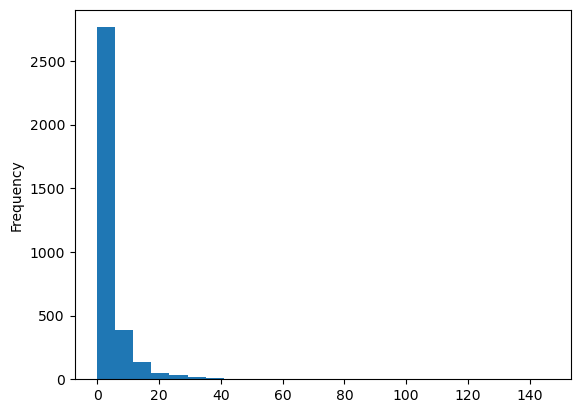

In [291]:
df["Dexa_Freq_During_Rx"].plot.hist(bins=25)
plt.show()

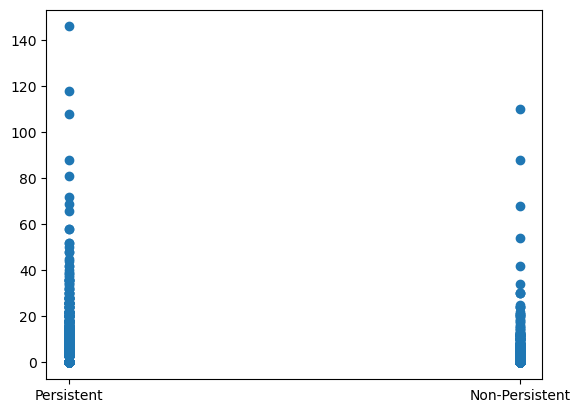

In [292]:
plt.scatter(df["Persistency_Flag"], df["Dexa_Freq_During_Rx"])
plt.show()

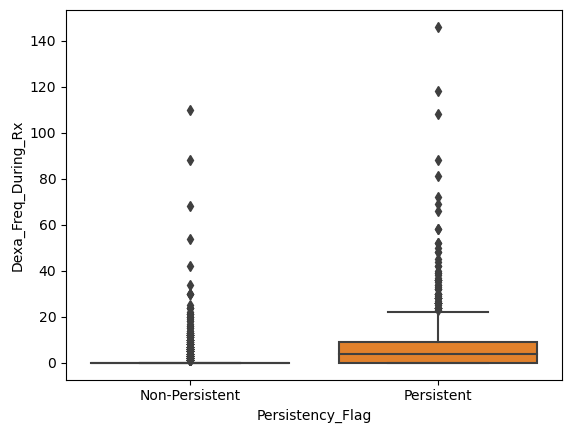

In [293]:
sns.boxplot(data=df, x="Persistency_Flag", y="Dexa_Freq_During_Rx")
plt.show()

## Data Manupulation / Feature Engineering.

We know that our data have unknown values, and i will convert them to NaN values.

In [294]:
def detect_none(x):
    if x in ["Unknown", "Other/Unknown"]:
        return None
    else:
        return x

df = df.applymap(detect_none)

In [295]:
# Percentages of unknown values.
none_columns = df.isna().sum()

percent_none = none_columns[none_columns > 0] / len(df) * 100

percent_none

Race                        2.832944
Ethnicity                   2.657710
Region                      1.752336
Ntm_Speciality              9.053738
Risk_Segment_During_Rx     43.720794
Tscore_Bucket_During_Rx    43.720794
Change_T_Score             43.720794
Change_Risk_Segment        65.099299
dtype: float64

Drop the columns who has high percentage of Null values, which are: "Risk_Segment_During_Rx",
                      "Tscore_Bucket_During_Rx",
                      "Change_T_Score",
                      "Change_Risk_Segment",

In [296]:
df = df.drop(columns=["Risk_Segment_During_Rx",
                      "Tscore_Bucket_During_Rx",
                      "Change_T_Score",
                      "Change_Risk_Segment",])

In [297]:
def fillnamode(df):
    """
    Function for filling the NaN values with 
    most freaquent value.
    """
    most_frqnt_vlue = df.mode()[0]
    df = df.fillna(most_frqnt_vlue)
    return df

Filling the columns with most freaquent values.

In [298]:
df["Race"] = fillnamode(df["Race"])
df["Ethnicity"] = fillnamode(df["Ethnicity"])
df["Region"] = fillnamode(df["Region"])
df["Ntm_Speciality"] = fillnamode(df["Ntm_Speciality"])

In [299]:
def find_outliers_IQR(df):
   """Function for finding outliers.""" 
   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))]

   return outliers

Dropping The Outliers.

In [300]:
outliers = find_outliers_IQR(df["Dexa_Freq_During_Rx"])
df.drop(index=outliers.index, inplace=True)
len(df)

3067

Using Label Encoder to 

In [301]:
def label_encoder(df, columns):
    """
    Perform label encoding on specified columns of a Pandas DataFrame.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        columns (list): List of column names to be encoded.
    
    Returns:
        pd.DataFrame: Encoded DataFrame.
    """
    encoded_df = df.copy()
    label_encoder = LabelEncoder()
    
    for column in columns:
        if column in encoded_df.columns:
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])
        else:
            raise(IndexError)
    
    return encoded_df

In [302]:
# Columns to be encoded.
categorical_columns = df.loc[:, df.nunique() < 50].columns
df = label_encoder(df, categorical_columns)
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,1,2,1,3,3,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1,P2,0,1,1,1,3,0,5,0,1,...,0,0,0,0,0,0,0,0,0,0
2,P3,0,0,2,0,0,1,5,0,1,...,0,1,0,0,0,0,0,0,0,2
3,P4,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1
4,P5,0,0,2,1,0,3,5,0,1,...,0,0,0,0,0,0,0,0,0,1


## Chi2 Analysis


> Hypothesis: 
* h0: There is no association  between target and the feature.
* h1: There is an association  between target and the feature.
* if p is below 0.05 we reject the null hypothesis

Text(0.5, 1.0, 'Hypothesis Testing')

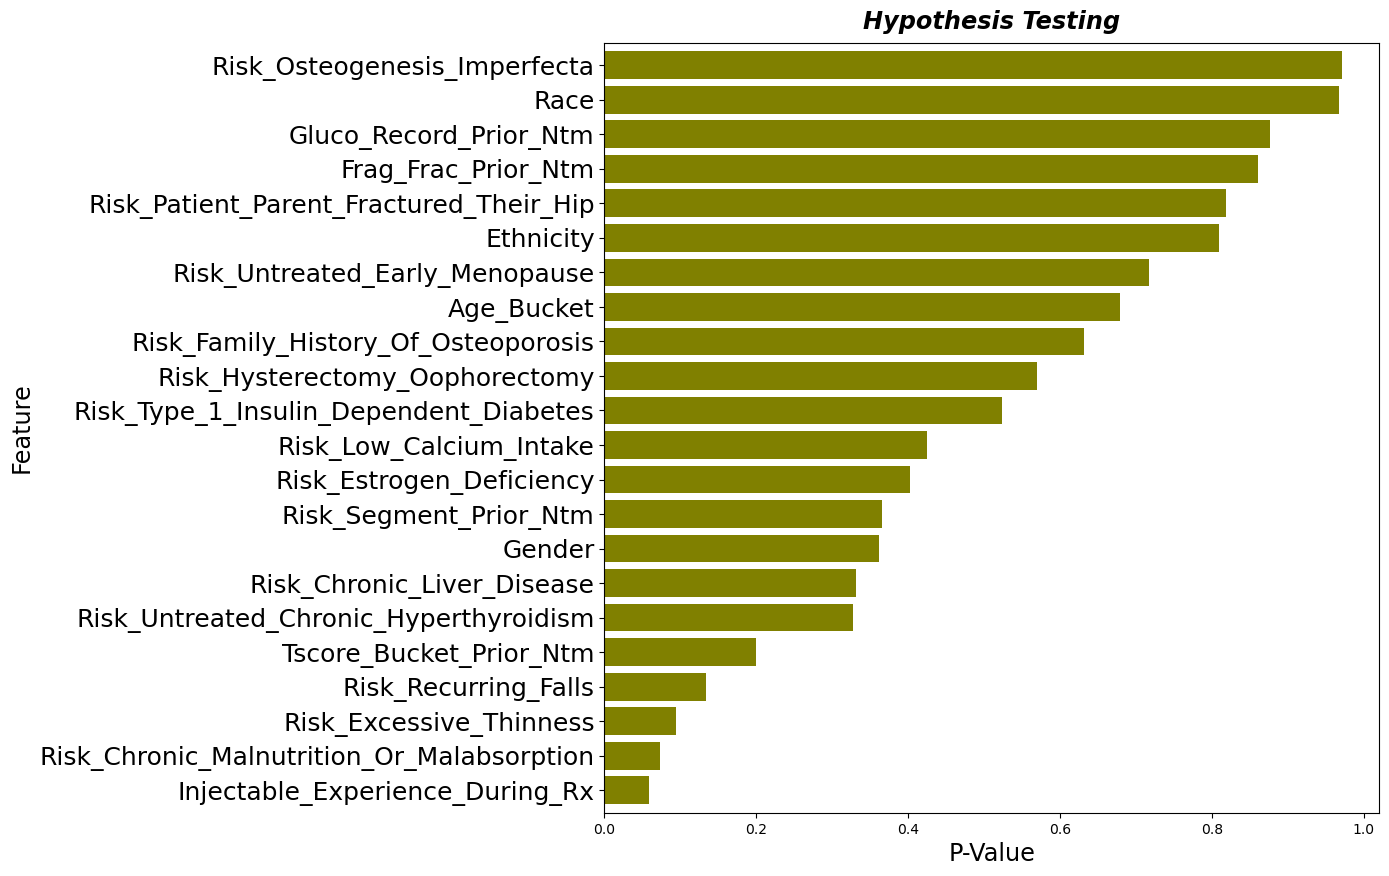

In [303]:
X = df.drop(columns=["Ptid", "Persistency_Flag", "Dexa_Freq_During_Rx"])
y = df["Persistency_Flag"]

p_scores = pd.Series(chi2(X, y)[1], index=X.columns)
plt.figure(figsize=(10, 10))
ax = p_scores[p_scores > 0.05].sort_values().plot.barh(width=0.8,
                                                       color="olive")
ax.tick_params("y", labelsize=18, labelcolor="black")
ax.set_xlabel("P-Value", size="xx-large")
ax.set_ylabel("Feature", size="xx-large")
ax.set_title("Hypothesis Testing", weight="bold", style="italic", size="xx-large", pad=10)

The values suggest that we failed the reject the hypothesis, therefore the assosiation between the target variable can be misleading therefore dropping those columns is a good idea.

In [304]:
df = df.drop(columns=p_scores[p_scores > 0.05].index)
df.shape

(3067, 43)

Final shape of the figure is (3067, 43)

## Using WOE / IV For feature selection and imputing.

This is another way of approaching the problem we can calculate information value and weight of evidence to impute the values in our dataset.

Weight of Evidence (WoE) and Information Value (IV) are commonly used techniques in machine learning for feature transformation and variable selection in predictive modeling, particularly in the context of binary classification problems. Since our context is binary classification, using WOE / IV can be a good strategy.

In [305]:
PATH_EXCEL = r"C:\Users\ayber\OneDrive\Desktop\DataGlacier Project\Healthcare_dataset.xlsx"

df = pd.read_excel(PATH_EXCEL,
                   sheet_name=1)
feature_description = pd.read_excel(PATH_EXCEL,
                     sheet_name=0)

feature_description.head()

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table


In [306]:


iv = pd.Series()


for i in range(2, len(df.columns)):
    

    df_woe = df.pivot_table(index=df.columns[i], 
                            columns=["Persistency_Flag"],
                            values="Ptid",
                            aggfunc="count")

    woe_iv = pd.DataFrame(columns=["woe", "iv"])
    for index, value in df_woe.iterrows():
        prcnt_bad = value["Non-Persistent"] / df_woe["Non-Persistent"].sum()
        prcnt_good = value["Persistent"] / df_woe["Persistent"].sum()
        woe_iv.loc[index, "woe"] =  np.log(prcnt_good / prcnt_bad) 
        woe_iv.loc[index, "iv"] =  woe_iv.loc[index, "woe"] * (prcnt_good - prcnt_bad)
        df[df.columns[i]].replace(index, woe_iv.loc[index, "woe"], inplace=True)
    df_woe_iv = pd.concat([df_woe, woe_iv], axis=1)

    df_woe_iv.loc["Total"] = df_woe_iv.sum()
    iv[df.columns[i]] = df_woe_iv.loc["Total", "iv"]

    

df_woe_iv

C:\Users\ayber\AppData\Local\Temp\ipykernel_2236\1386210684.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  iv = pd.Series()


,Non-Persistent,Persistent,woe,iv
0,658,312,-0.241602,0.015982
1,771,471,0.01177,0.00005
2,467,314,0.107664,0.002677
3,179,138,0.244468,0.005676
4,50,41,0.306149,0.002568
5,6,9,0.910065,0.003797
6,3,3,0.5046,0.000465
7,1,1,0.5046,0.000155
Total,2135,1289,2.347713,0.03137


Above is an example of weight of evidince and information value of a particular column.

### IV VALUES

* IV < 0.02: No predictive power
* 0.02 ≤ IV < 0.1: Weak predictive

Text(0.5, 1.0, 'No Predictive Power')

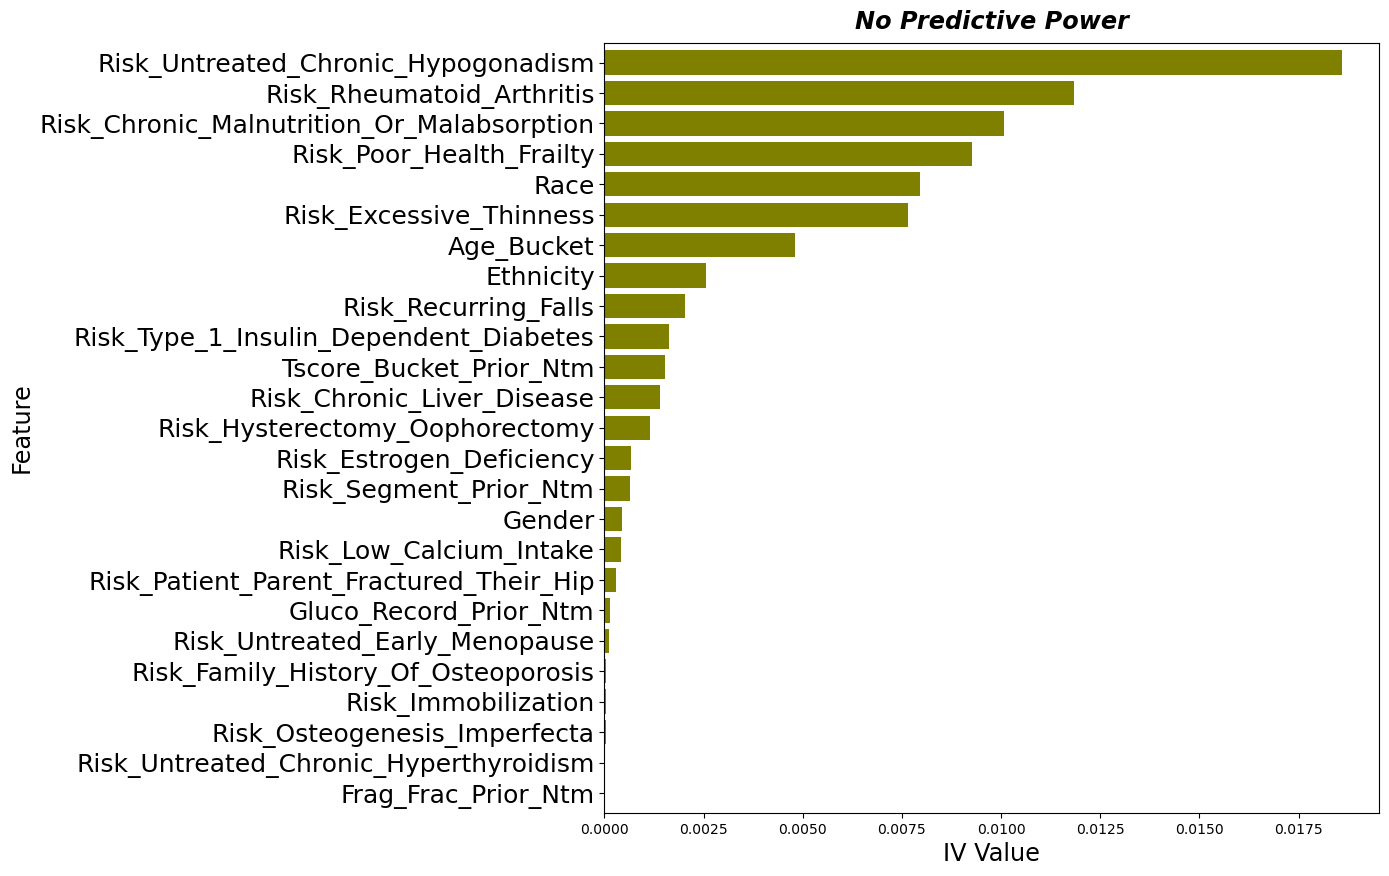

In [307]:
# Graph of No Predictive Values

plt.figure(figsize=(10, 10))
ax = iv[iv<0.02].sort_values().plot.barh(width=0.8,
                                    color="olive")
ax.tick_params("y", labelsize=18, labelcolor="black")
ax.set_xlabel("IV Value", size="xx-large")
ax.set_ylabel("Feature", size="xx-large")
ax.set_title("No Predictive Power", weight="bold", style="italic", size="xx-large", pad=10)

Dropping the features which has no predictive power.

In [308]:
df.drop(columns = iv[iv<0.02].index, inplace=True)
df.head()

,Ptid,Persistency_Flag,Region,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_During_Rx,...,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Smoking_Tobacco,Risk_Vitamin_D_Insufficiency,Count_Of_Risks
0,P1,Persistent,0.280560,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,-0.241602
1,P2,Non-Persistent,0.280560,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,-0.241602
2,P3,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,-0.273037,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,-0.098665,-0.160988,0.107664
3,P4,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,0.700344,-0.701987,-0.701987,-0.083083,...,-0.144445,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,1.323727,0.405139,-0.160988,0.011770
4,P5,Non-Persistent,-0.227854,-0.240802,-0.249537,-0.245418,0.700344,-0.701987,-0.701987,-0.083083,...,0.352063,-0.188547,-0.217938,-0.210712,-0.160038,-0.19419,-0.158897,0.405139,-0.160988,0.011770


In [310]:
df.shape

(3424, 44)

New Dataset has shape of 3424 rows and 44 columns.